In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics
import statsmodels.api as sm

In [12]:
data = pd.read_csv("Datasets/EthBit.csv")
data.head()

,Date,EthOpen,EthHigh,EthLow,EthClose,EthAdjClose,EthVolume,BitOpen,BitHigh,BitLow,BitClose,BitAdjClose,BitVolume
0,10/11/17,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5.208250e+09
1,11/11/17,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4.908680e+09
2,12/11/17,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8.957350e+09
3,13/11/17,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6.263250e+09
4,14/11/17,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09


In [13]:
# Calculate Ethereum price
data['EthPrice'] = (data['EthHigh'] + data['EthLow']) / 2

# Calculate Bitcoin price
data['BitPrice'] = (data['BitHigh'] + data['BitLow']) / 2

# Create a new DataFrame with just the Date, Ethereum price, and Bitcoin price
eth_bit_prices = data[['Date', 'EthPrice', 'BitPrice']].copy()

# Display the new DataFrame
print(eth_bit_prices)


          Date     EthPrice      BitPrice
0     10/11/17   309.629989   6874.435059
1     11/11/17   308.822495   6538.685059
2     12/11/17   308.833008   6072.029785
3     13/11/17   317.720001   6327.739990
4     14/11/17   328.470001   6613.364990
...        ...          ...           ...
2259   17/1/24  2550.584961  42689.599610
2260   18/1/24  2486.199707  41753.759770
2261   19/1/24  2458.008057  41215.808595
2262   20/1/24          NaN           NaN
2263   21/1/24  2466.985230  41654.150395

[2264 rows x 3 columns]


In [14]:
# Shift Ethereum prices by one day to align with Bitcoin prices
eth_bit_prices['EthPriceNextDay'] = eth_bit_prices['EthPrice'].shift(-1)

# Drop the last row to handle NaN values created by shifting
eth_bit_prices.dropna(inplace=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=eth_bit_prices['EthPriceNextDay'], y=eth_bit_prices['BitPrice'])
plt.title('Ethereum Prices 1 Day Later vs. Bitcoin Prices')
plt.xlabel('Ethereum Price 1 Day Later')
plt.ylabel('Bitcoin Price')
plt.show()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(x=eth_bit_prices['EthPriceNextDay'])
plt.title('Histogram of Ethereum Prices 1 Day Later')
plt.xlabel('Ethereum Price 1 Day Later')
plt.ylabel('Frequency')
plt.show()

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=eth_bit_prices['EthPriceNextDay'])
plt.title('Violin Plot of Ethereum Prices 1 Day Later')
plt.xlabel('Ethereum Price 1 Day Later')
plt.show()

<Figure size 1000x800 with 0 Axes>

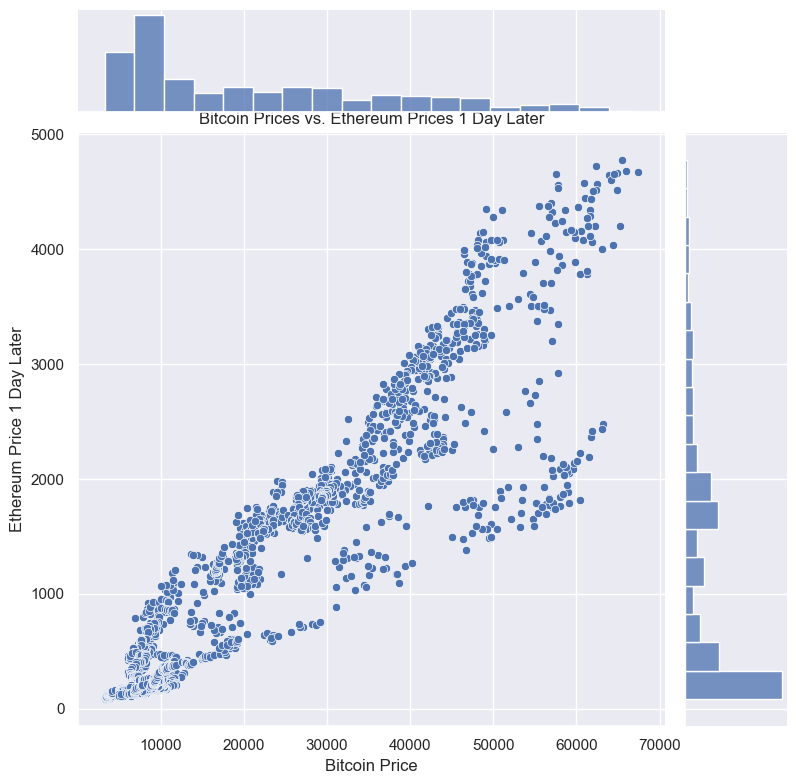

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a joint plot
sns.jointplot(data=eth_bit_prices, x='BitPrice', y='EthPriceNextDay', height=8, kind='scatter')

# Add title and axis labels
plt.title('Bitcoin Prices vs. Ethereum Prices 1 Day Later')
plt.xlabel('Bitcoin Price')
plt.ylabel('Ethereum Price 1 Day Later')

# Show the plot
plt.show()


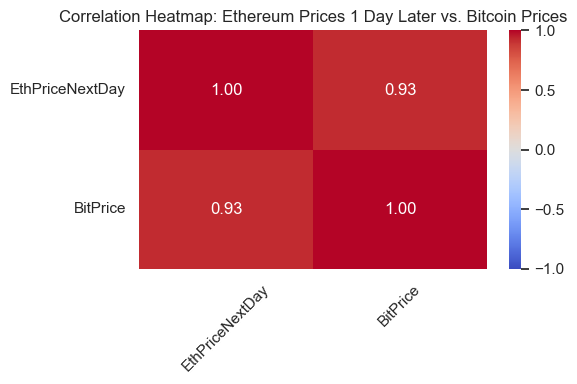

In [ ]:
# Select only the 'EthPriceNextDay' and 'BitPrice' columns
selected_columns = eth_bit_prices[['EthPriceNextDay', 'BitPrice']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')

# Add title and adjust plot settings
plt.title('Correlation Heatmap: Ethereum Prices 1 Day Later vs. Bitcoin Prices')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### There is a high correlation coefficient between Ethereum prices and Bitcoin prices which suggests a strong linear relationship between the two. In this case, the correlation coefficient close to 1 (0.93 for prices and 0.86 for the volume) which indicates a positive correlation, meaning that as Bitcoin prices increase (or decrease), Ethereum prices tend to increase (or decrease) as well.

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


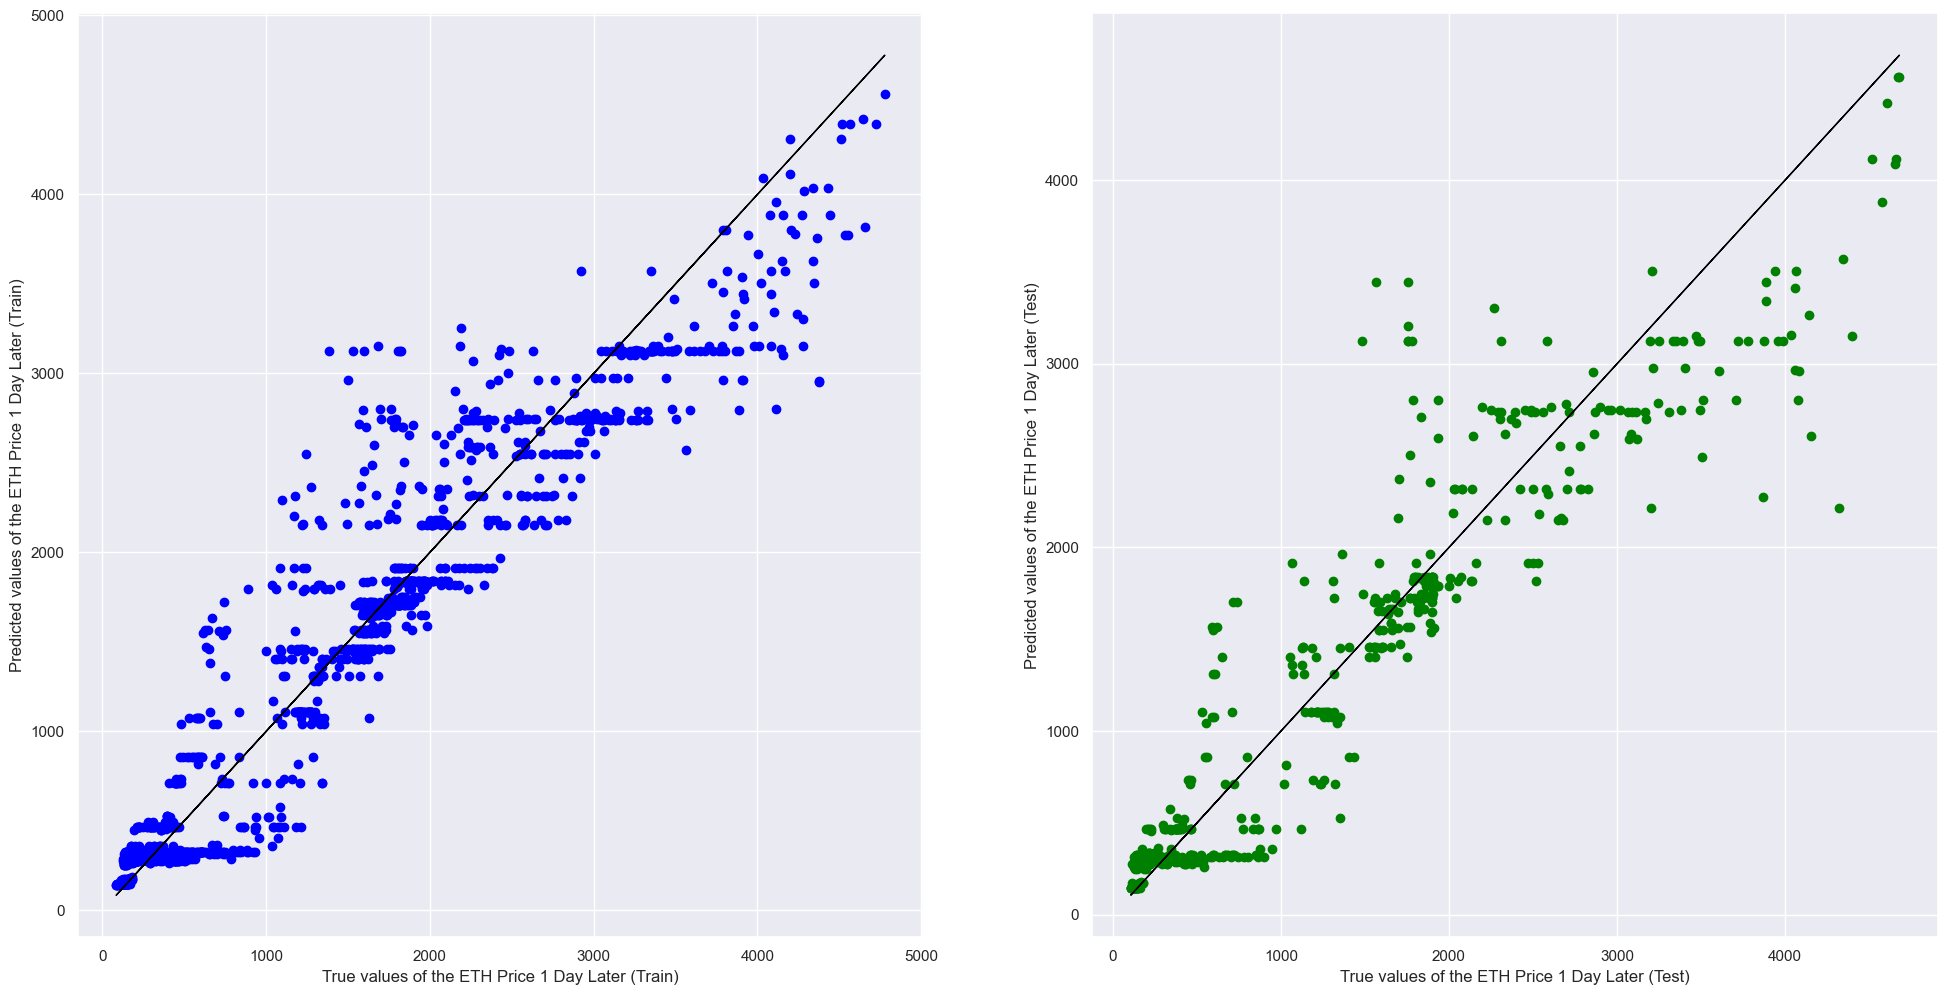

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9192667146209317
Mean Squared Error (MSE) 	: 99180.53589705146

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.883671490386682
Mean Squared Error (MSE) 	: 150683.62439352123



In [ ]:
# Import essential models and functions from sklearn
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(eth_bit_prices['EthPriceNextDay'])
X = pd.DataFrame(eth_bit_prices['BitPrice'])

# Adding parameters for gradient boosted regression

params = {
    "n_estimators": 100, # How many models we are gonna create during gradient boosting
    "max_depth": 8, # nodes of gradient boosting during each descend 
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
reg = ensemble.GradientBoostingRegressor()       # create the gradient boosted regression object
reg.fit(X_train, y_train)        # train the gradient boosted model

# Predict Response corresponding to Predictors
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the ETH Price 1 Day Later (Train)")
axes[0].set_ylabel("Predicted values of the ETH Price 1 Day Later (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the ETH Price 1 Day Later (Test)")
axes[1].set_ylabel("Predicted values of the ETH Price 1 Day Later (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", reg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", reg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [ ]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 99180.54
Pred Standard Error (SE) 	: 315.12


In [ ]:
X_pred = pd.DataFrame(eth_bit_prices['BitPrice'])
y_pred = reg.predict(X_pred)

y_95l = pd.DataFrame(y_pred - 1.96*StdE_pred).rename(columns = {0 : "95 Lower"})
y_95u = pd.DataFrame(y_pred + 1.96*StdE_pred).rename(columns = {0 : "95 Upper"})
y_99l = pd.DataFrame(y_pred - 2.58*StdE_pred).rename(columns = {0 : "99 Lower"})
y_99u = pd.DataFrame(y_pred + 2.58*StdE_pred).rename(columns = {0 : "99 Upper"})

pkmndata_int = pd.concat([eth_bit_prices, y_95l, y_95u, y_99l, y_99u], axis = 1)
pkmndata_int

,Date,EthPrice,BitPrice,EthPriceNextDay,95 Lower,95 Upper,99 Lower,99 Upper
0,10/11/17,309.629989,6874.435059,308.822495,-332.529707,902.722574,-527.901242,1098.094108
1,11/11/17,308.822495,6538.685059,308.833008,-332.529707,902.722574,-527.901242,1098.094108
2,12/11/17,308.833008,6072.029785,317.720001,-343.067341,892.184940,-538.438875,1087.556474
3,13/11/17,317.720001,6327.739990,328.470001,-343.067341,892.184940,-538.438875,1087.556474
4,14/11/17,328.470001,6613.364990,335.362488,-332.529707,902.722574,-527.901242,1098.094108
...,...,...,...,...,...,...,...,...
2256,14/1/24,2524.378296,42395.105470,2510.794922,2119.003806,3354.256087,1923.632272,3549.627622
2257,15/1/24,2510.794922,42512.570315,2556.785400,2119.003806,3354.256087,1923.632272,3549.627622
2258,16/1/24,2556.785400,42826.134765,2550.584961,2119.003806,3354.256087,1923.632272,3549.627622
2259,17/1/24,2550.584961,42689.599610,2486.199707,2119.003806,3354.256087,1923.632272,3549.627622


Let's compare the mean squared error of the 100 models we created during gradient boosting our regression model.

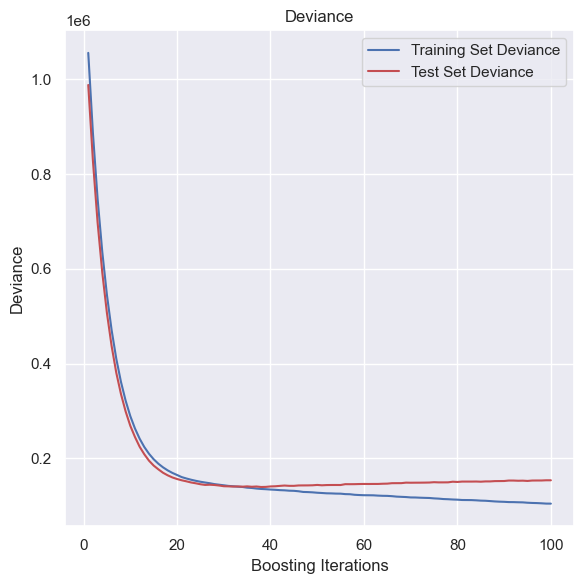

In [ ]:
test_score = np.zeros((params["n_estimators"]), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()


We can see that the MSE of test data set has gone up while the training set is keep decreasing. This could be the result of our model overfitting